<a href="https://colab.research.google.com/github/ecomunick/python_projects/blob/main/statistics1/Ana%CC%81lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [dados.Renda.min(),
           2 * 788,
           5 * 788,
           15 * 788,
           25 * 788,
           dados.Renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
freq = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest=True)
)
freq

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
perc = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest=True),
    normalize=True
) * 100
perc

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
dist_freq_renda = pd.DataFrame(
    {'Frequencia': freq, 'Porcentagem(%)':perc}
)
dist_freq_renda.sort_index(ascending=False)

,Frequencia,Porcentagem(%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

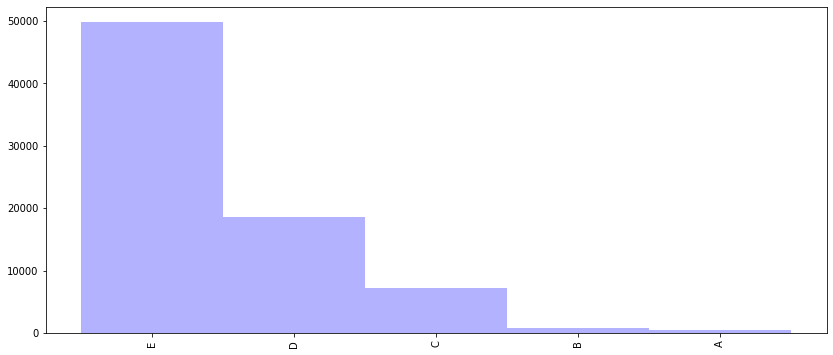

In [9]:
dist_freq_renda['Frequencia'].plot.bar(width=1, color='blue', alpha=0.3, figsize=(14, 6))

> ### Conclusões

As analises demonstram que a maioria (~65%) dos entrevistados encontram-se na classe de renda "E" que equivale até 2 SM.  O grafico apresenta as diferentes classes de Renda. 

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='lightblue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


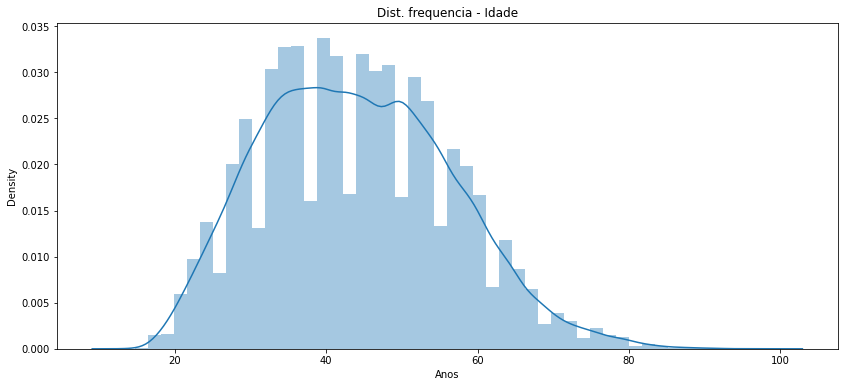

In [10]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(14,6)
ax.set_title("Dist. frequencia - Idade")
ax.set_xlabel("Anos")
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


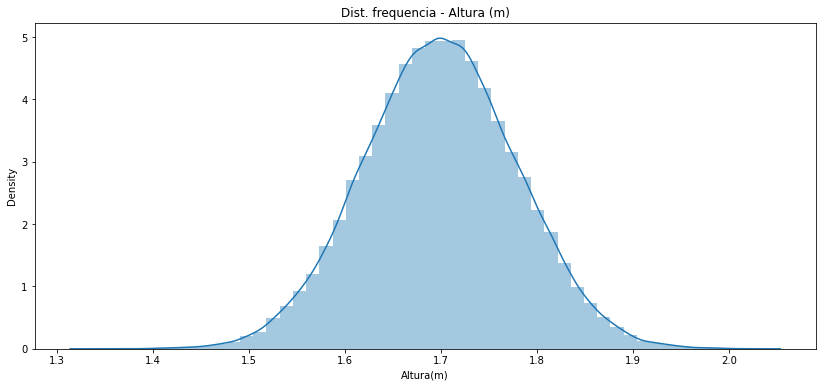

In [11]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(14,6)
ax.set_title("Dist. frequencia - Altura (m)")
ax.set_xlabel("Altura(m)")
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


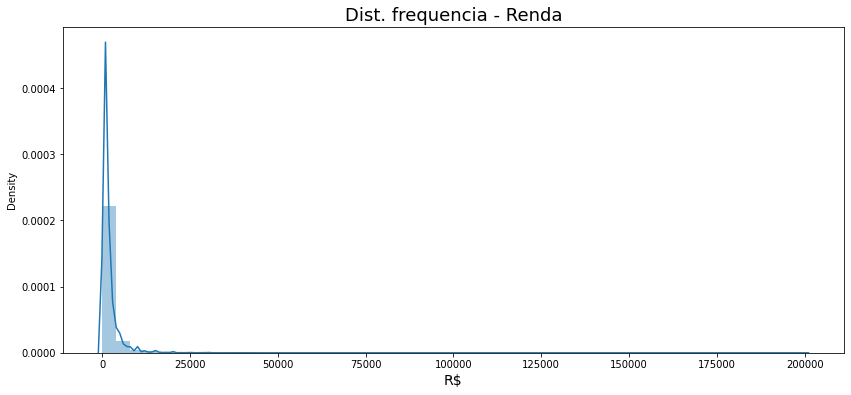

In [12]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(14,6)
ax.set_title("Dist. frequencia - Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax

> ### Conclusões

Pelo greafico de renda, podemos concluir que a mesma é desproporcional, pois a assimetria demosntra que a maioria das pessoas recebem poucos SM.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


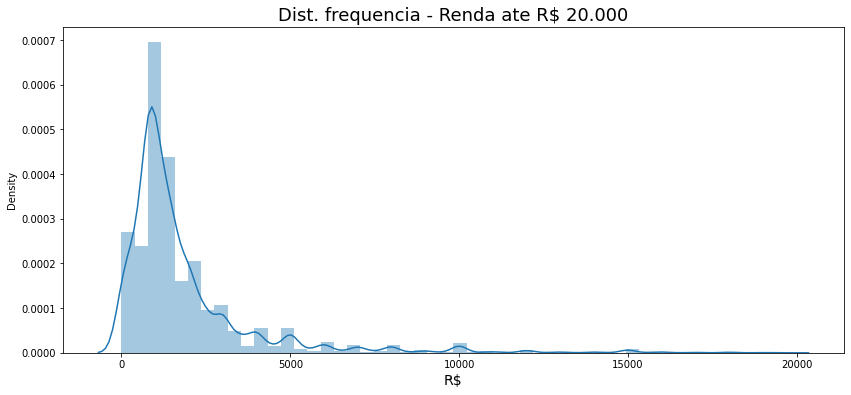

In [13]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title("Dist. frequencia - Renda ate R$ 20.000", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [15]:
# frequencia absoluta
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [16]:
# frequencia %
frequencia = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)*100
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia.round(2)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões

Dentre os entrevistados, a amostra possui grande representatividade de pardas do sexo masculino seguido de pessoas brancas do mesmo sexo. Indigenas, amarelos e pretos estão sub-representados bem como pessoas do sexo feminino.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [18]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [19]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [20]:
dados.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [21]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [22]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [40]:
stat_by_sexo_cor = pd.crosstab(dados.Cor, 
                            dados.Sexo,
                            values = dados.Renda,
                            aggfunc = {'mean', 'median', 'max'})
stat_by_sexo_cor.rename(index = cor, inplace=True)
stat_by_sexo_cor.rename(columns = sexo, inplace=True)
stat_by_sexo_cor.round(2)


max                mean             median         
Sexo     Masculino  Feminino Masculino Feminino Masculino Feminino
Cor                                                               
Indígena   10000.0  120000.0   1081.71  2464.39     797.5    788.0
Branca    200000.0  100000.0   2925.74  2109.87    1700.0   1200.0
Preta      50000.0   23000.0   1603.86  1134.60    1200.0    800.0
Amarela    50000.0   20000.0   4758.25  3027.34    2800.0   1500.0
Parda     100000.0   30000.0   1659.58  1176.76    1200.0    800.0

> ### Conclusões

No geral, pode-se dizer que pessoas do sexo masculino recebem mais que pessoas do sexo feminino. Chama atencao ao facto de que entre as pessoas indigenas, talvez haja um outlier nos dados ou de facto, o sexo feminino recebe mais que o sexo masculino. Talvez as mulhers indigenas estejam mais ligadas ao trabalho assalariado enquanto os homens no trabalho informal e nao declarado.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [43]:
stat_dispersao_by_sexo_cor = pd.crosstab(dados.Cor, 
                            dados.Sexo,
                            values = dados.Renda,
                            aggfunc = ['mad', 'var', 'std']) # aqui usei lista [] ao inves de chaves {}
stat_dispersao_by_sexo_cor.rename(index = cor, inplace=True)
stat_dispersao_by_sexo_cor.rename(columns = sexo, inplace=True)
stat_dispersao_by_sexo_cor.round(2)

mad                   var                     std          
Sexo     Masculino Feminino    Masculino      Feminino Masculino  Feminino
Cor                                                                       
Indígena    798.91  3007.89   1449841.13  1.429818e+08   1204.09  11957.50
Branca     2261.01  1670.97  22570023.41  1.056909e+07   4750.79   3251.01
Preta       975.60   705.45   3749293.59  1.821960e+06   1936.31   1349.80
Amarela    3709.60  2549.15  32957069.62  1.392166e+07   5740.82   3731.17
Parda      1125.83   811.58   5345747.15  2.547960e+06   2312.09   1596.23

> ### Conclusões

Nota-se que a variancia entre as pessoas do sexo feminino é menor que a variancia entre as pessoas do sexo masculino.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

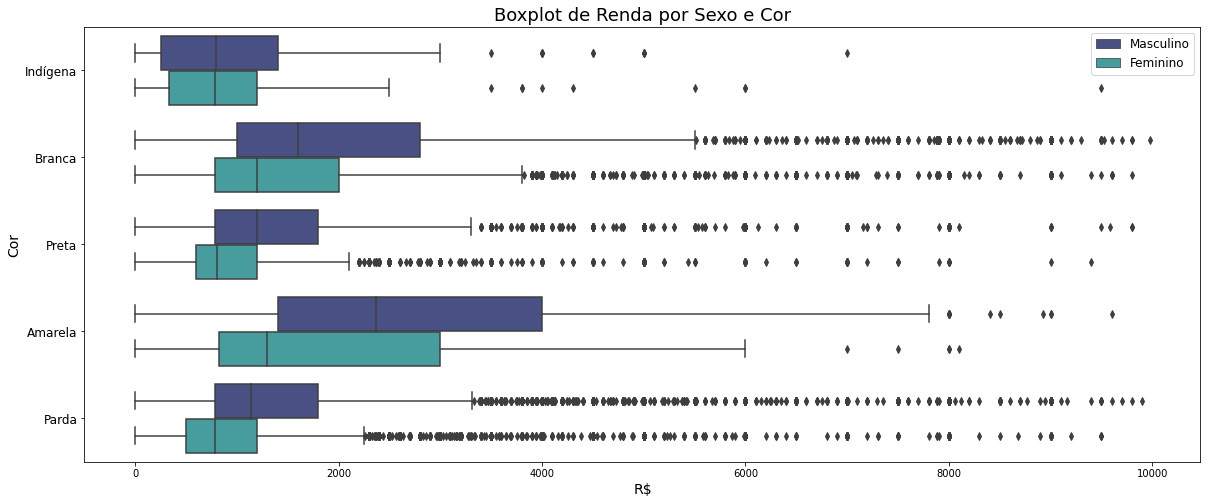

In [79]:
ax = sns.boxplot(x= 'Renda', y='Cor', hue='Sexo', data=dados.query('Renda < 10000'), orient='h', palette="mako")
ax.figure.set_size_inches(20, 8) # personalizar o tamanho da figura
ax.set_title('Boxplot de Renda por Sexo e Cor', fontsize = 18) # conf o titulo do grafico
ax.set_xlabel('R$', fontsize = 14) # configurando o eixo x
ax.set_ylabel('Cor', fontsize = 14) # configurando o eixo y
ax.set_yticklabels(['Indígena',	'Branca',	'Preta',	'Amarela',	'Parda'], fontsize = 12) # config os ticks eixo y 

#Configuracao da legenda do grafico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

> ### Conclusões

No grafico acima, observa-se que pessoas Amarelas e Brancas são as que tem o maior range salarial. E é nitido a diferenca de SM entre pessoas do sexo feminino e masculino. Tambem é possivel verificar o outlier no sexo feminino em pessoas indigenas.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [86]:
from scipy import stats

percent = stats.percentileofscore(dados.Renda, 788, kind='weak') # weak inclui valores abaixo ate o valor de 788
print("{0:.2f}%".format(percent))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [90]:
valor = dados.Renda.quantile(.99)
print("R${0:.2f}".format(valor))

R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [99]:
stat_by_estudo_sexo = pd.crosstab(dados['Anos de Estudo'],
                                  dados.Sexo,
                                  aggfunc = ['mean', 'median', 'max', 'std'],
                                  values = dados.Renda).round(2)
stat_by_estudo_sexo.rename(index= anos_de_estudo, inplace = True)
stat_by_estudo_sexo.rename(columns= sexo, inplace=True)
stat_by_estudo_sexo

mean             median           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
Não determinados                 1295.76   798.17      1200      788   

                                     max                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     30000    10000   1023.90   639.31  
1 ano                              30000     2000   1331.95   425.29  
2 anos                             40000     4000   1435.17   498.23  
3 anos                             80000     3500   2143.80   424.12  
4 anos                             50000    10000   1419.82   629.55  
5 anos                             35000     8000   1484.65   635.78  
6 anos                             25000     6000   1476.63   574.55  
7 anos                             40000     9000   1419.71   602.04  
8 anos                             30000    18000   1515.58   896.78  
9 anos                             60000    20000   2137.66   973.22  
10 anos                            45000     6000   2078.61   620.61  
11 anos                           200000   100000   2676.54  1819.04  
12 anos                            30000   120000   2268.08  4851.83  
13 anos                            25000    20000   2797.12  2053.79  
14 anos                            50000    20000   3987.21  2064.08  
15 anos ou mais                   200000   100000   7447.61  4212.77  
Não determinados                    7000     3000    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [109]:
# dicionario com chave e valor
anos_de_estudo

{1: 'Sem instrução e menos de 1 ano',
 2: '1 ano',
 3: '2 anos',
 4: '3 anos',
 5: '4 anos',
 6: '5 anos',
 7: '6 anos',
 8: '7 anos',
 9: '8 anos',
 10: '9 anos',
 11: '10 anos',
 12: '11 anos',
 13: '12 anos',
 14: '13 anos',
 15: '14 anos',
 16: '15 anos ou mais',
 17: 'Não determinados'}

In [112]:
# como criamos um dicionario antes, colocamos numa lista com "for" ; a palavra "i" ou "key" no inicio (i for i ou key for key) indifere
[i for i in anos_de_estudo.keys()] # para ver as chaves do dicionario

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [113]:
# como criamos um dicionario antes, colocamos numa lista com "for" ; a palavra "i" ou "key" no inicio (i for i ou key for key) indifere
[key for key in anos_de_estudo.values()] # para ver os valores do dicionario.
# no caso do exemplo abaixo, queriamos os valores nos ticks do eixo Y, por isso passamos valores e nao chaves

['Sem instrução e menos de 1 ano',
 '1 ano',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 'Não determinados']

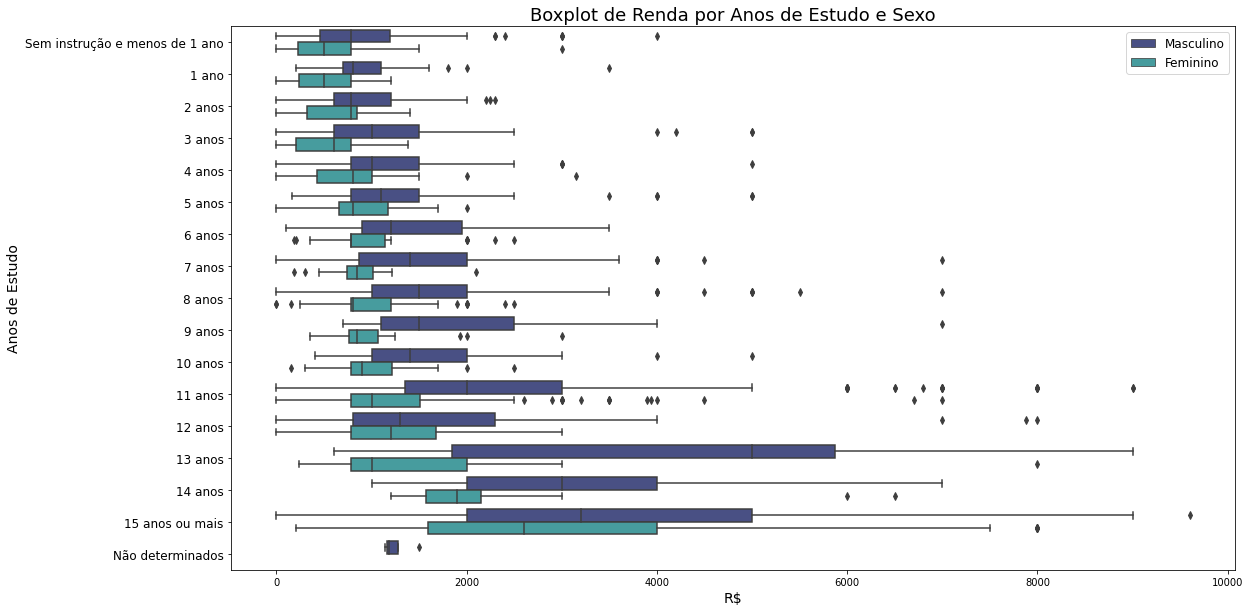

In [123]:
ax = sns.boxplot(x= 'Renda', y='Anos de Estudo', hue='Sexo', data=dados.query('Renda < 10000 and Idade ==50'), orient='h', palette='mako')
ax.figure.set_size_inches(18, 10) # personalizar o tamanho da figura
ax.set_title('Boxplot de Renda por Anos de Estudo e Sexo', fontsize = 18) # conf o titulo do grafico
ax.set_xlabel('R$', fontsize = 14) # configurando o eixo x
ax.set_ylabel('Anos de Estudo', fontsize = 14) # configurando o eixo y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12) # config os ticks/labels de cada categoria do eixo Y 

#Configuracao da legenda do grafico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

> ### Conclusões

No grafico acima é possivel perceber que parece haver uma relacao dos anos de estudo com a renda, quanto maior a escolaridade, maior a renda da pessoa. Contudo, também é possível verificar que independente da escolaridade, os SM de pessoas do sexo masculino, são superiores aos das pessoas do sexo feminino.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [126]:
stats_by_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']}).round(2)
stats_by_uf.rename(index= uf) # uf minusculo tb vem do dicionario la acima


Renda                         
                        mean  median     max      std
UF                                                   
Rondônia             1789.76  1200.0   50000  2406.16
Acre                 1506.09   900.0   30000  2276.23
Amazonas             1445.13   900.0   22000  1757.94
Roraima              1783.59  1000.0   20000  2079.66
Pará                 1399.08   850.0   50000  2053.78
Amapá                1861.35  1200.0   15580  2020.69
Tocantins            1771.09  1000.0   60000  2934.59
Maranhão             1019.43   700.0   30000  1887.82
Piauí                1074.55   750.0   40000  2373.36
Ceará                1255.40   789.0   25000  1821.96
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Paraíba              1293.37   788.0   30000  1950.27
Pernambuco           1527.08   900.0   50000  2389.62
Alagoas              1144.55   788.0   11000  1237.86
Sergipe              1109.11   788.0   16000  1479.00
Bahia                1429.65   800.0  200000  3507.92
Minas Gerais         2056.43  1200.0  100000  3584.72
Espírito Santo       2026.38  1274.0  100000  3513.85
Rio de Janeiro       2496.40  1400.0  200000  5214.58
São Paulo            2638.10  1600.0   80000  3503.78
Paraná               2493.87  1500.0  200000  4302.94
Santa Catarina       2470.85  1800.0   80000  3137.65
Rio Grande do Sul    2315.16  1500.0   35000  2913.34
Mato Grosso do Sul   2262.60  1500.0   42000  3031.42
Mato Grosso          2130.65  1500.0   35000  2542.63
Goiás                1994.58  1500.0   30000  2221.93
Distrito Federal     4241.95  2000.0  100000  5550.46

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

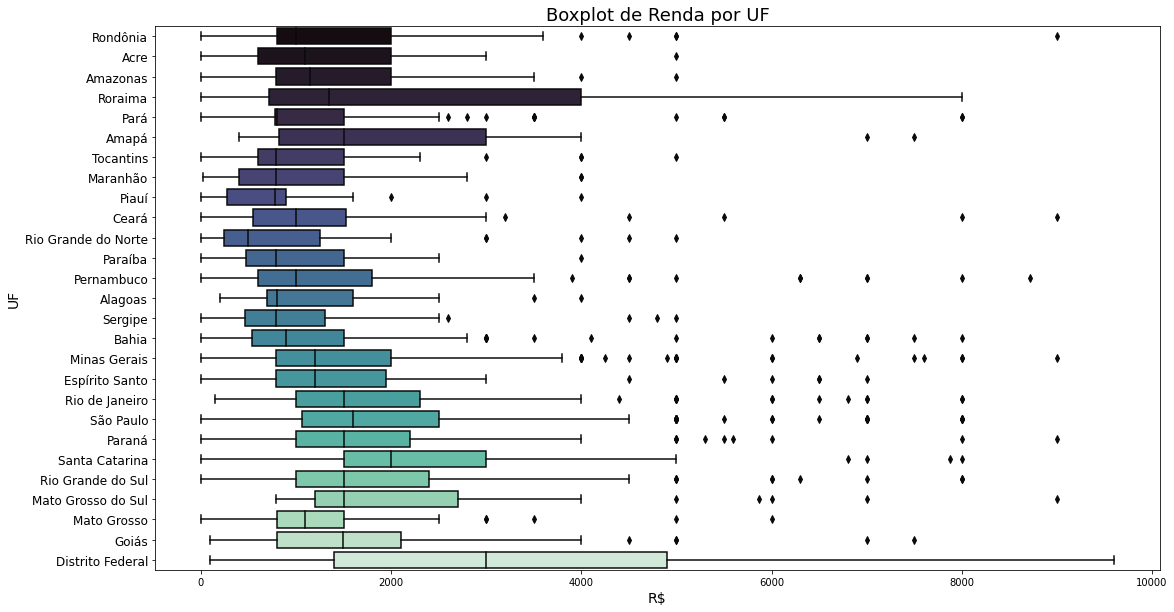

In [136]:
ax = sns.boxplot(x= 'Renda', y='UF', data=dados.query('Renda < 10000 and Idade ==50'), orient='h', palette='mako')
ax.figure.set_size_inches(18, 10) # personalizar o tamanho da figura
ax.set_title('Boxplot de Renda por UF', fontsize = 18) # conf o titulo do grafico
ax.set_xlabel('R$', fontsize = 14) # configurando o eixo x
ax.set_ylabel('UF', fontsize = 14) # configurando o eixo y
ax.set_yticklabels([key for key in uf.values()], fontsize = 12) # config os ticks/labels de cada categoria do eixo Y 
ax
#Configuracao da legenda do grafico (Sexo)
#handles, _ = ax.get_legend_handles_labels()
#ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

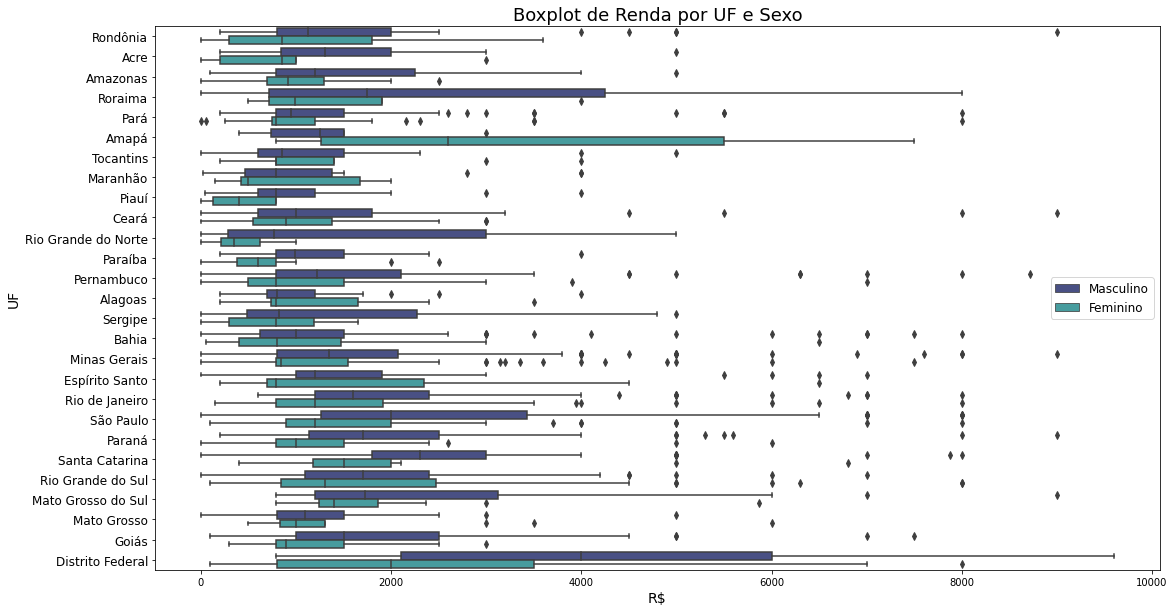

In [133]:
# por UF e Sexo
ax = sns.boxplot(x= 'Renda', y='UF', hue='Sexo', data=dados.query('Renda < 10000 and Idade ==50'), orient='h', palette='mako')
ax.figure.set_size_inches(18, 10) # personalizar o tamanho da figura
ax.set_title('Boxplot de Renda por UF e Sexo', fontsize = 18) # conf o titulo do grafico
ax.set_xlabel('R$', fontsize = 14) # configurando o eixo x
ax.set_ylabel('UF', fontsize = 14) # configurando o eixo y
ax.set_yticklabels([key for key in uf.values()], fontsize = 12) # config os ticks/labels de cada categoria do eixo Y 

#Configuracao da legenda do grafico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

> ### Conclusões

Ao analisar o boxplot de renda por UF, verifica-se que a unidade federativa do Distrito Federal, onde esta localizado os tres poderes (executivo, legislativo e judiciario) politicos do BR, é o que apresenta os maiores ganhos em SMs.